In [1]:
#libraries that will be used in this HW 
import os
import shutil as sh
import numpy as np
import pandas as pd
#you can add other libraries as needed
import datetime
import matplotlib.pylab as plt
%matplotlib inline
# Default value of display.max_rows is 10 so at max
# 10 rows will be printed. Set it None to display
# all rows in the dataframe
pd.set_option('display.max_rows', None)

In [ ]:
## This was steps that were needed to be taken to create the "toyota_lexus" first sheet. However, once there was a
## discovery that some data was not correct, changes were made directly to the excel file. The cell below this one 
## reflects the new, correct data plus all the code from this cell that organized the file.

# # Read excel data
# df_wide = pd.read_excel("TOYOTA-LEXUS_YEARLY SALES.xlsx")

# # Convert year to object
# df_wide["YEARL"] = df_wide["YEARL"].astype(int).astype(object)

# # Change column names
# df_wide = df_wide.rename(columns={"YEARL": "year", "BRAND": "brand"})

# # Unpivot everything besides the year, brand column
# df_tall = df_wide.melt(id_vars=['brand','year'], var_name='month', value_name='monthly_sales')

# # Convert and concat columns
# df_tall['date'] = df_tall['month'] + '-' + df_tall['year'].astype(str)

# # Change to datetime
# df_tall['date'] = pd.to_datetime(df_tall['date'])

# # Add quarter info
# df_tall['quarter'] = df_tall['date'].dt.quarter

# # Remove time from a pandas series of dates
# df_tall['date'] = df_tall['date'].dt.date

# # Sort ur_tall by date in ascending order
# df = df_tall.sort_values('date')

# # Dropping rows of months in 2022 that haven't happened
# df = df[df.monthly_sales != 0]

In [2]:
# Read updated data for Lexus 2021
df_wide = pd.read_excel("toyota_lexus.xlsx", sheet_name=None)

# Create toy-lex dataframe
df = df_wide['toy-lex']

In [3]:
# View combined monthly sales dataframe
df.tail()

,brand,year,month,monthly_sales,date,quarter
413,TOYOTA,2022,MARCH,170664,2022-03-01,1
414,LEXUS,2022,APR,22296,2022-04-01,2
415,TOYOTA,2022,APR,157760,2022-04-01,2
416,TOYOTA,2022,MAY,149584,2022-05-01,2
417,LEXUS,2022,MAY,21767,2022-05-01,2


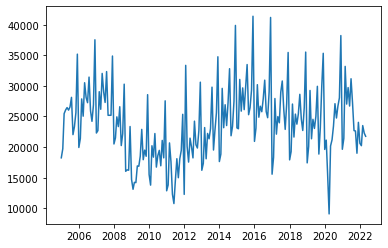

In [4]:
# Create lexus sales only
lexus = df[df["brand"] == "LEXUS"]

# Reset index
lexus = lexus.reset_index(drop=True)

# Create monthly return column
lexus['Monthly Return'] = (lexus['monthly_sales'].pct_change(1))*100

# Create yearly return column
lexus['Yearly Return'] = (lexus['monthly_sales'].pct_change(12))*100

# Dropping rows of months in 2022 that haven't happened
lexus = lexus[lexus.monthly_sales != 0]

# Plot sales
plt.plot(lexus['date'],lexus['monthly_sales'])

In [5]:
# View lexus dataframe
lexus.tail()

,brand,year,month,monthly_sales,date,quarter,Monthly Return,Yearly Return
204,LEXUS,2022,JAN,20620,2022-01-01,1,-14.236992,4.984471
205,LEXUS,2022,FEB,20231,2022-02-01,1,-1.886518,-5.577336
206,LEXUS,2022,MARCH,23514,2022-03-01,1,16.227572,-29.144820
207,LEXUS,2022,APR,22296,2022-04-01,2,-5.179893,-17.507770
208,LEXUS,2022,MAY,21767,2022-05-01,2,-2.372623,-26.769614


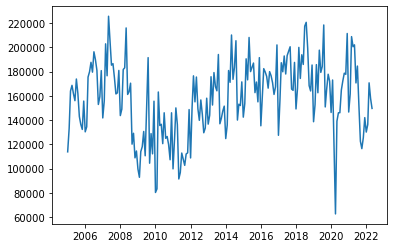

In [6]:
# Create toyota sales only
toyota = df[df["brand"] == "TOYOTA"]

# Reset index
toyota = toyota.reset_index(drop=True)

# Create monthly return column
toyota['Monthly Return'] = (toyota['monthly_sales'].pct_change(1))*100

# Create yearly return column
toyota['Yearly Return'] = (toyota['monthly_sales'].pct_change(12))*100

# Dropping rows of months in 2022 that haven't happened
toyota = toyota[toyota.monthly_sales != 0]

# Plot sales
plt.plot(toyota['date'],toyota['monthly_sales'])

In [7]:
# View toyota dataframe
toyota.tail()

,brand,year,month,monthly_sales,date,quarter,Monthly Return,Yearly Return
204,TOYOTA,2022,JAN,130067,2022-01-01,1,-8.397070,-11.272179
205,TOYOTA,2022,FEB,136275,2022-02-01,1,4.772925,-15.684455
206,TOYOTA,2022,MARCH,170664,2022-03-01,1,25.235003,-18.264759
207,TOYOTA,2022,APR,157760,2022-04-01,2,-7.561056,-21.313176
208,TOYOTA,2022,MAY,149584,2022-05-01,2,-5.182556,-25.951814


In [8]:
# Create an aggregate dataframe of mean sales per month for that year and sum of all sales that years
x = toyota.groupby("year")["monthly_sales"].agg([np.mean, sum])
x

,mean,sum
year,,
2005,150012.833333,1800154
2006,170588.083333,2047057
2007,179847.083333,2158165
2008,153388.916667,1840667
2009,125615.000000,1507380
2010,124111.416667,1489337
2011,116236.500000,1394838
2012,148112.500000,1777350
2013,157557.000000,1890684


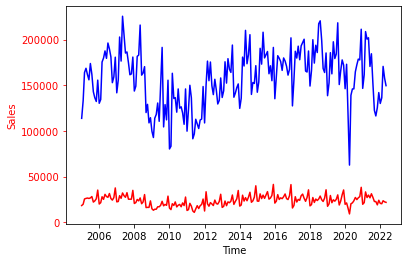

In [9]:
# Plot toyota and lexus monthly sales
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params('y', colors=color)
    
fig, ax = plt.subplots()
plot_timeseries(ax, toyota.date, toyota.monthly_sales,'blue', 'Time', 'Sales')
plot_timeseries(ax, lexus.date,lexus.monthly_sales,'red', 'Time', 'Sales')
plt.show()

In [ ]:
## These are the steps that were needed to be taken to create the "lx" sheet. However, sales in July 2021 for 
## this vehicle were incorrect so changes were made directly to the excel file. The cell below this one 
## reflects the new, correct data plus all the code from this cell that organized the file.

# # Read excel data
# df_wide = pd.read_excel("TOYOTA-LEXUS_YEARLY SALES_1.xlsx", skiprows=2, sheet_name=None)

# # Create lx dataframe
# lx = df_wide['Lexus - LX']

# # Create brand column
# lx['brand'] = 'lexus'

# # Convert year to object
# lx["YEAR"] = lx["YEAR"].astype(int).astype(object)

# # Unpivot everything besides the year, brand column
# lx = lx.melt(id_vars=['Model','brand','YEAR'], var_name='month', value_name='monthly_sales')

# # Convert and concat columns
# lx['date'] = lx['month'] + '-' + lx['YEAR'].astype(str)

# # Change to datetime
# lx['date'] = pd.to_datetime(lx['date'])

# # Add quarter info
# lx['quarter'] = lx['date'].dt.quarter

# # Remove time from a pandas series of dates
# lx['date'] = lx['date'].dt.date

# # Sort lx by date in ascending order
# df = lx.sort_values('date')

# # Create monthly return column
# df['Monthly Return'] = (df['monthly_sales'].pct_change(1))*100

# # Create yearly return column
# df['Yearly Return'] = (df['monthly_sales'].pct_change(12))*100

# # Dropping rows of months in 2022 that haven't happened
# lx = df[df.monthly_sales != 0]

In [10]:
# Read updated data for July 2021
df_wide = pd.read_excel("toyota_lexus.xlsx", sheet_name=None)

# Create lx dataframe
lx = df_wide['Lexus - LX']

# Create monthly return column
lx['Monthly Return'] = (lx['monthly_sales'].pct_change(1))*100

# Create yearly return column
lx['Yearly Return'] = (lx['monthly_sales'].pct_change(12))*100

# Dropping rows of months in 2022 that haven't happened
lx = lx[lx.monthly_sales != 0]

In [11]:
# View Lexus LX dataframe
lx.tail()

,Model,brand,YEAR,month,monthly_sales,date,quarter,Monthly Return,Yearly Return
204,Lexus - LX,lexus,2022,JAN,217,2022-01-01,1,-57.450980,-55.983773
205,Lexus - LX,lexus,2022,FEB,143,2022-02-01,1,-34.101382,-66.193853
206,Lexus - LX,lexus,2022,MARCH,198,2022-03-01,1,38.461538,-53.301887
207,Lexus - LX,lexus,2022,APR,377,2022-04-01,2,90.404040,-9.592326
208,Lexus - LX,lexus,2022,MAY,404,2022-05-01,2,7.161804,19.526627


In [12]:
# Read excel data
df_wide = pd.read_excel("TOYOTA-LEXUS_YEARLY SALES_1.xlsx", skiprows=2, sheet_name=None)

# Create land cruiser dataframe
landcruiser = df_wide['Toyota - Land Cruiser']

# Create brand column
landcruiser['brand'] = 'toyota'

# Convert year to object
landcruiser["YEAR"] = landcruiser["YEAR"].astype(int).astype(object)

# Unpivot everything besides the year, brand column
landcruiser = landcruiser.melt(id_vars=['Model','brand','YEAR'], var_name='month', value_name='monthly_sales')

# Convert and concat columns
landcruiser['date'] = landcruiser['month'] + '-' + landcruiser['YEAR'].astype(str)

# Change to datetime
landcruiser['date'] = pd.to_datetime(landcruiser['date'])

# Add quarter info
landcruiser['quarter'] = landcruiser['date'].dt.quarter

# Remove time from a pandas series of dates
landcruiser['date'] = landcruiser['date'].dt.date

# Sort land cruiser by date in ascending order
landcruiser = landcruiser.sort_values('date')

# Create monthly return column
landcruiser['Monthly Return'] = (landcruiser['monthly_sales'].pct_change(1))*100

# Create yearly return column
landcruiser['Yearly Return'] = (landcruiser['monthly_sales'].pct_change(12))*100

# Dropping rows of months in 2022 that haven't happened
landcruiser = landcruiser[landcruiser.monthly_sales != 0]

In [13]:
# View Toyota Land Cruiser dataframe
landcruiser.head()

,Model,brand,YEAR,month,monthly_sales,date,quarter,Monthly Return,Yearly Return
0,Toyota - Land Cruiser,toyota,2005,JAN,465,2005-01-01,1,NaN,NaN
18,Toyota - Land Cruiser,toyota,2005,FEB,422,2005-02-01,1,-9.247312,NaN
36,Toyota - Land Cruiser,toyota,2005,MARCH,430,2005-03-01,1,1.895735,NaN
54,Toyota - Land Cruiser,toyota,2005,APR,425,2005-04-01,2,-1.162791,NaN
72,Toyota - Land Cruiser,toyota,2005,MAY,395,2005-05-01,2,-7.058824,NaN


In [14]:
# Read excel data
df_wide = pd.read_excel("TOYOTA-LEXUS_YEARLY SALES_1.xlsx", skiprows=2, sheet_name=None)

# Create es dataframe
es = df_wide['Lexus - ES']

# Create brand column
es['brand'] = 'lexus'

# Convert year to object
es["YEAR"] = es["YEAR"].astype(int).astype(object)

# Unpivot everything besides the year, brand column
es = es.melt(id_vars=['Model','brand','YEAR'], var_name='month', value_name='monthly_sales')

# Convert and concat columns
es['date'] = es['month'] + '-' + es['YEAR'].astype(str)

# Change to datetime
es['date'] = pd.to_datetime(es['date'])

# Add quarter info
es['quarter'] = es['date'].dt.quarter

# Remove time from a pandas series of dates
es['date'] = es['date'].dt.date

# Sort es by date in ascending order
es = es.sort_values('date')

# Create monthly return column
es['Monthly Return'] = (es['monthly_sales'].pct_change(1))*100

# Create yearly return column
es['Yearly Return'] = (es['monthly_sales'].pct_change(12))*100

# Dropping rows of months in 2022 that haven't happened
es = es[es.monthly_sales != 0]

In [15]:
# View Lexus ES dataframe
es.head()

,Model,brand,YEAR,month,monthly_sales,date,quarter,Monthly Return,Yearly Return
0,Lexus - ES,lexus,2005,JAN,4487,2005-01-01,1,NaN,NaN
18,Lexus - ES,lexus,2005,FEB,4583,2005-02-01,1,2.139514,NaN
36,Lexus - ES,lexus,2005,MARCH,5706,2005-03-01,1,24.503600,NaN
54,Lexus - ES,lexus,2005,APR,5597,2005-04-01,2,-1.910270,NaN
72,Lexus - ES,lexus,2005,MAY,6027,2005-05-01,2,7.682687,NaN


In [16]:
# Read excel data
df_wide = pd.read_excel("TOYOTA-LEXUS_YEARLY SALES_1.xlsx", skiprows=2, sheet_name=None)

# Create avalon dataframe
avalon = df_wide['Toyota - Avalon']

# Create brand column
avalon['brand'] = 'toyota'

# Convert year to object
avalon["YEAR"] = avalon["YEAR"].astype(int).astype(object)

# Unpivot everything besides the year, brand column
avalon = avalon.melt(id_vars=['Model','brand','YEAR'], var_name='month', value_name='monthly_sales')

# Convert and concat columns
avalon['date'] = avalon['month'] + '-' + avalon['YEAR'].astype(str)

# Change to datetime
avalon['date'] = pd.to_datetime(avalon['date'])

# Add quarter info
avalon['quarter'] = avalon['date'].dt.quarter

# Remove time from a pandas series of dates
avalon['date'] = avalon['date'].dt.date

# Sort avalon by date in ascending order
avalon = avalon.sort_values('date')

# Create monthly return column
avalon['Monthly Return'] = (avalon['monthly_sales'].pct_change(1))*100

# Create yearly return column
avalon['Yearly Return'] = (avalon['monthly_sales'].pct_change(12))*100

# Dropping rows of months in 2022 that haven't happened
avalon = avalon[avalon.monthly_sales != 0]

In [17]:
# View Toyota Avalon dataframe
avalon.head()

,Model,brand,YEAR,month,monthly_sales,date,quarter,Monthly Return,Yearly Return
0,Toyota - Avalon,toyota,2005,JAN,1491,2005-01-01,1,NaN,NaN
18,Toyota - Avalon,toyota,2005,FEB,5317,2005-02-01,1,256.606304,NaN
36,Toyota - Avalon,toyota,2005,MARCH,8625,2005-03-01,1,62.215535,NaN
54,Toyota - Avalon,toyota,2005,APR,9229,2005-04-01,2,7.002899,NaN
72,Toyota - Avalon,toyota,2005,MAY,9165,2005-05-01,2,-0.693466,NaN


In [ ]:
## These are the steps taken to create the "rx" sheet. However, there were no sales data for 2022 for
## this vehicle so changes were made directly to the excel file. The cell below this one 
## reflects the new, correct data plus all the code from this cell that organized the file.


# # Read excel data
# df_wide = pd.read_excel("TOYOTA-LEXUS_YEARLY SALES_1.xlsx", skiprows=2, sheet_name=None)

# # Create rx dataframe
# df = df_wide['Lexus - RX']

# # Create brand column
# df['brand'] = 'lexus'

# # Convert year to object
# df["YEAR"] = df["YEAR"].astype(int).astype(object)

# # Unpivot everything besides the year, brand column
# df = df.melt(id_vars=['Model','brand','YEAR'], var_name='month', value_name='monthly_sales')

# # Convert and concat columns
# df['date'] = df['month'] + '-' + df['YEAR'].astype(str)

# # Change to datetime
# df['date'] = pd.to_datetime(df['date'])

# # Add quarter info
# df['quarter'] = df['date'].dt.quarter

# # Remove time from a pandas series of dates
# df['date'] = df['date'].dt.date

# # Sort lx by date in ascending order
# df = df.sort_values('date')

# # Create monthly return column
# df['Monthly Return'] = (df['monthly_sales'].pct_change(1))*100

# # Create yearly return column
# df['Yearly Return'] = (df['monthly_sales'].pct_change(12))*100

# # Dropping rows of months in 2022 that haven't happened
# rx = df[df.monthly_sales != 0]

In [18]:
# Read update data with 2022 sales
df_wide = pd.read_excel("toyota_lexus.xlsx", sheet_name=None)

# Create rx dataframe
rx = df_wide['Lexus - RX']

# Create monthly return column
rx['Monthly Return'] = (rx['monthly_sales'].pct_change(1))*100

# Create yearly return column
rx['Yearly Return'] = (rx['monthly_sales'].pct_change(12))*100

# Dropping rows of months in 2022 that haven't happened
rx = rx[rx.monthly_sales != 0]

In [19]:
# View Lexus RX dataframe
rx.tail(15)

,Model,brand,YEAR,month,monthly_sales,date,quarter,Monthly Return,Yearly Return
194,Lexus - RX,lexus,2021,MARCH,12950,2021-03-01,1,63.820367,134.007951
195,Lexus - RX,lexus,2021,APR,10146,2021-04-01,2,-21.652510,253.027140
196,Lexus - RX,lexus,2021,MAY,8953,2021-05-01,2,-11.758328,40.197307
197,Lexus - RX,lexus,2021,JUNE,9604,2021-06-01,2,7.271306,43.215031
198,Lexus - RX,lexus,2021,JULY,11307,2021-07-01,3,17.732195,28.488636
199,Lexus - RX,lexus,2021,AUG,8102,2021-08-01,3,-28.345273,-26.157492
200,Lexus - RX,lexus,2021,SEP,8572,2021-09-01,3,5.801037,-11.318022
201,Lexus - RX,lexus,2021,OCT,9416,2021-10-01,4,9.846010,-3.306634
202,Lexus - RX,lexus,2021,NOV,9685,2021-11-01,4,2.856839,-8.251232
203,Lexus - RX,lexus,2021,DEC,11594,2021-12-01,4,19.710893,-20.118506


In [20]:
# Read excel data
df_wide = pd.read_excel("TOYOTA-LEXUS_YEARLY SALES_1.xlsx", skiprows=2, sheet_name=None)

# Create rav 4 dataframe
rav4 = df_wide['Toyota - Rav 4']

# Create brand column
rav4['brand'] = 'toyota'

# Make sure Toyota - Rav 4 is the model name in all rows
rav4['Model'] = 'Toyota - Rav 4'

# Convert year to object
rav4["YEAR"] = rav4["YEAR"].astype(int).astype(object)

# Unpivot everything besides the year, brand column
rav4 = rav4.melt(id_vars=['Model','brand','YEAR'], var_name='month', value_name='monthly_sales')

# Convert and concat columns
rav4['date'] = rav4['month'] + '-' + rav4['YEAR'].astype(str)

# Change to datetime
rav4['date'] = pd.to_datetime(rav4['date'])

# Add quarter info
rav4['quarter'] = rav4['date'].dt.quarter

# Remove time from a pandas series of dates
rav4['date'] = rav4['date'].dt.date

# Sort rav4 by date in ascending order
rav4 = rav4.sort_values('date')

# Create monthly return column
rav4['Monthly Return'] = (rav4['monthly_sales'].pct_change(1))*100

# Create yearly return column
rav4['Yearly Return'] = (rav4['monthly_sales'].pct_change(12))*100

# Dropping rows of months in 2022 that haven't happened
rav4 = rav4[rav4.monthly_sales != 0]

In [21]:
# View rav4 dataframe
rav4.tail()

,Model,brand,YEAR,month,monthly_sales,date,quarter,Monthly Return,Yearly Return
17,Toyota - Rav 4,toyota,2022,JAN,29457,2022-01-01,1,-14.886301,-6.080219
35,Toyota - Rav 4,toyota,2022,FEB,34407,2022-02-01,1,16.804155,-3.925949
53,Toyota - Rav 4,toyota,2022,MARCH,37328,2022-03-01,1,8.489552,-20.710311
71,Toyota - Rav 4,toyota,2022,APR,33610,2022-04-01,2,-9.960351,-17.813914
89,Toyota - Rav 4,toyota,2022,MAY,32883,2022-05-01,2,-2.163047,9.544273


In [22]:
# Save each of the dataframes and combine into one excel file
with pd.ExcelWriter('toyota_lexus1.xlsx') as writer:  
    df.to_excel(writer, sheet_name='toy-lex', index=False)
    lexus.to_excel(writer, sheet_name='Lexus', index=False)
    toyota.to_excel(writer, sheet_name='Toyota', index=False)
    lx.to_excel(writer, sheet_name='Lexus - LX', index=False)
    landcruiser.to_excel(writer, sheet_name='Toyota - Land Cruiser', index=False)
    es.to_excel(writer, sheet_name='Lexus - ES',index=False)
    avalon.to_excel(writer, sheet_name='Toyota - Avalon', index=False)
    rx.to_excel(writer, sheet_name='Lexus - RX', index=False)
    rav4.to_excel(writer, sheet_name='Toyota - Rav 4', index=False)

In [23]:
# Read excel data
hybrid = pd.read_excel("Toyota Hybrid vs Fuel.xlsx", skiprows=4, sheet_name=None)

# Create dataframe on data sheet
df = hybrid['Data']

# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0'])

# Create brand column
df['brand'] = 'toyota'

# Multiply column by 1000 to reflect millions in sales and not confuse
df['Hybrid electric vehicle'] = (df['Hybrid electric vehicle'])*1000

# Multiply column by 1000 to reflect millions in sales and not confuse
df['Plug-in hybrid electric vehicle'] = (df['Plug-in hybrid electric vehicle'])*1000

# Multiply column by 1000 to reflect millions in sales and not confuse
df['Fuel cell electric vehicle'] = (df['Fuel cell electric vehicle'])*1000

# Multiply column by 1000 to reflect millions in sales and not confuse
df['All-electric vehicle'] = (df['All-electric vehicle'])*1000

# Multiply column by 1000 to reflect millions in sales and not confuse
df['Fuel Vehicles'] = (df['Fuel Vehicles'])*1000

# Multiply column by 1000 to reflect millions in sales and not confuse
df['Total Sales'] = (df['Total Sales'])*1000

# Change column names
df = df.rename(columns={"Unnamed: 1": "year"})

# Convert year to object
df["year"] = df["year"].astype(int).astype(object)

# Create yearly return column
df['Hybrid Yearly Return'] = (df['Hybrid electric vehicle'].pct_change(1))*100

# Create yearly return column
df['Plug-in hybrid electric vehicle Yearly Return'] = (df['Plug-in hybrid electric vehicle'].pct_change(1))*100

# Create yearly return column
df['Fuel cell electric vehicle Yearly Return'] = (df['Fuel cell electric vehicle'].pct_change(1))*100

# Create yearly return column
df['All-electric vehicle Yearly Return'] = (df['All-electric vehicle'].pct_change(1))*100

# Create yearly return column
df['Fuel Vehicles Yearly Return'] = (df['Fuel Vehicles'].pct_change(1))*100

# Create yearly return column
df['Total Sales Yearly Return'] = (df['Total Sales'].pct_change(1))*100

# Save to excel
df.to_excel('global_hybrid1.xlsx', index=False)

In [24]:
# View the dataframe
df

,year,Hybrid electric vehicle,Plug-in hybrid electric vehicle,Fuel cell electric vehicle,All-electric vehicle,Fuel Vehicles,Total Sales,brand,Hybrid Yearly Return,Plug-in hybrid electric vehicle Yearly Return,Fuel cell electric vehicle Yearly Return,All-electric vehicle Yearly Return,Fuel Vehicles Yearly Return,Total Sales Yearly Return
0,2018,1630740.0,46670.0,2460.0,1000.0,7283524.0,8964394.0,toyota,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1921310.0,56520.0,2490.0,0.0,8759680.0,10740000.0,toyota,17.818291,21.105635,1.219512,-100.000000,20.267058,19.807318
2,2020,1954450.0,48510.0,1770.0,3350.0,7491920.0,9500000.0,toyota,1.724865,-14.171975,-28.915663,inf,-14.472675,-11.545624
3,2021,2482240.0,111880.0,5920.0,14410.0,7885550.0,10500000.0,toyota,27.004528,130.632859,234.463277,330.149254,5.254060,10.526316


In [25]:
# Observe data types of the columns
df.dtypes

year                                              object
Hybrid electric vehicle                          float64
Plug-in hybrid electric vehicle                  float64
Fuel cell electric vehicle                       float64
All-electric vehicle                             float64
Fuel Vehicles                                    float64
Total Sales                                      float64
brand                                             object
Hybrid Yearly Return                             float64
Plug-in hybrid electric vehicle Yearly Return    float64
Fuel cell electric vehicle Yearly Return         float64
All-electric vehicle Yearly Return               float64
Fuel Vehicles Yearly Return                      float64
Total Sales Yearly Return                        float64
dtype: object

In [26]:
# Read excel data
incentives = pd.read_excel("Incentives impact on sales.xlsx")

# Convert year to object
incentives["Year"] = incentives["Year"].astype(int).astype(object)

# Adding average transaction price column
avg_transaction_price = [28788,29885,30555,31272,32364,47561,47953,48736,49747,48835]

incentives['Average transaction price'] = avg_transaction_price

# Fixing incentives to go to the right brand
incent = [2063,2367,2136,2133,2209,3861,4531,6105,4705,5530]

# Making the changes to the incentive column
incentives['Incentives'] = incent

# Create lexus sales only
lexus_incentives = incentives[incentives["Brand"] == "Lexus"]

# Create incentives yearly change column
lexus_incentives['Incentives Yearly Change'] = (lexus_incentives['Incentives'].pct_change(1))*100

# Create average transaction price yearly change column
lexus_incentives['Average transaction price Yearly Change'] = (lexus_incentives['Average transaction price'].pct_change(1))*100

# Create toyota sales only
toyota_incentives = incentives[incentives["Brand"] == "Toyota"]

# Create yearly return column
toyota_incentives['Incentives Yearly Change'] = (toyota_incentives['Incentives'].pct_change(1))*100

# Create average transaction price yearly change column
toyota_incentives['Average transaction price Yearly Change'] = (toyota_incentives['Average transaction price'].pct_change(1))*100

# Save to excel sheets
with pd.ExcelWriter('incentives1.xlsx') as writer:  
    incentives.to_excel(writer, sheet_name='incentives', index=False)
    lexus_incentives.to_excel(writer, sheet_name='Lexus incentives', index=False)
    toyota_incentives.to_excel(writer, sheet_name='Toyota incentives', index=False)

C:\Users\14097\AppData\Local\Temp/ipykernel_26072/2359130454.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lexus_incentives['Incentives Yearly Change'] = (lexus_incentives['Incentives'].pct_change(1))*100
C:\Users\14097\AppData\Local\Temp/ipykernel_26072/2359130454.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lexus_incentives['Average transaction price Yearly Change'] = (lexus_incentives['Average transaction price'].pct_change(1))*100
C:\Users\14097\AppData\Local\Temp/ipykernel_26072/23591304

In [27]:
incentives

,Brand,Year,Quarter,Sales,Incentives,Average transaction price
0,Toyota,2015,3,517713,2063,28788
1,Toyota,2016,3,531152,2367,29885
2,Toyota,2017,3,516760,2136,30555
3,Toyota,2018,3,517192,2133,31272
4,Toyota,2019,3,514292,2209,32364
5,Lexus,2015,3,97155,3861,47561
6,Lexus,2016,3,95035,4531,47953
7,Lexus,2017,3,85445,6105,48736
8,Lexus,2018,3,84686,4705,49747
9,Lexus,2019,3,88470,5530,48835


In [28]:
lexus_incentives

,Brand,Year,Quarter,Sales,Incentives,Average transaction price,Incentives Yearly Change,Average transaction price Yearly Change
5,Lexus,2015,3,97155,3861,47561,NaN,NaN
6,Lexus,2016,3,95035,4531,47953,17.353017,0.824205
7,Lexus,2017,3,85445,6105,48736,34.738468,1.632849
8,Lexus,2018,3,84686,4705,49747,-22.932023,2.074442
9,Lexus,2019,3,88470,5530,48835,17.534538,-1.833276


In [29]:
toyota_incentives

,Brand,Year,Quarter,Sales,Incentives,Average transaction price,Incentives Yearly Change,Average transaction price Yearly Change
0,Toyota,2015,3,517713,2063,28788,NaN,NaN
1,Toyota,2016,3,531152,2367,29885,14.735822,3.810616
2,Toyota,2017,3,516760,2136,30555,-9.759189,2.241927
3,Toyota,2018,3,517192,2133,31272,-0.140449,2.346588
4,Toyota,2019,3,514292,2209,32364,3.563057,3.491942
